<a href="https://colab.research.google.com/github/Nirmalkumar1911/IndepVAR/blob/main/Stock%20Price%20Prediction_TimeSeries_Model_using_Auto-ARIMA%5BRealdata%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Problem** : You work for a Hedge Fund company in India.Your Employer wants you to Predict the Stock price of **Bajaj Finances** , so that he can choose whether to Invest in it or not in the short run.He gives you the Data set to create A Model to predict Data in Real time.

**1.Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**2.Importing Dataset**

In [2]:
df=pd.read_csv('BAJFINANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


**3.Preliminary Analysis and Missing value Detection & Rectification**

In [3]:
df.set_index('Date',inplace=True)

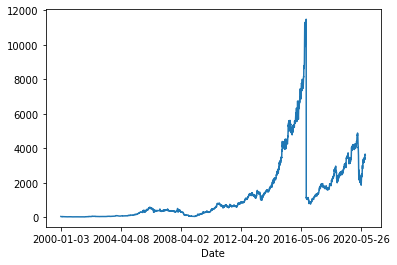

In [4]:
# Lets just see an Overview of how the Stock Price changes in Time #
df['VWAP'].plot()

In [5]:
df.shape

(5070, 14)

In [6]:
# Null value Detection #
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [7]:
# We drop the column Trades as almost half of it is Missing #
df.drop('Trades',axis=1,inplace=True)

In [8]:
# Lets just drop the rest of the missing values as they are not present from the beginning upto row no. 446 #
# If they were missing inbetween rather that From the beginning , we could have used Imputation methods like Mean/Moving Avg to fill it #
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [10]:
# The problem of missing values is Over and the new Shape is given below #
df.shape

(4624, 13)

In [11]:
data=df.copy()

In [12]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

**4.Creation of the Rolling Statistic**

A rolling analysis of a time series model is often used to assess the model’s stability over time. When analyzing financial time series data using a statistical model, a key assumption is that the parameters of the model are constant over time. However, the economic environment often changes considerably, and it may not be reasonable to assume that a model’s parameters are constant. A common technique to assess the constancy of a model’s parameters is to compute parameter estimates over a rolling window of a fixed size through the sample. If the parameters are truly constant over the entire sample, then the estimates over the rolling windows should not be too different. If the parameters change at some point during the sample, then the rolling estimates should capture this instability.

In [13]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [14]:
lag_features=['High','Low','Volume','Turnover']
window1=3
window2=7

In [15]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [16]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [17]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-01,BAJAUTOFIN,EQ,33.55,33.60,34.00,33.00,34.00,34.00,33.84,500,1.691750e+09,450.0,0.9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02,BAJAUTOFIN,EQ,34.00,34.85,34.85,33.85,34.20,34.20,33.97,1448,4.918660e+09,1348.0,0.9309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-03,BAJAUTOFIN,EQ,34.20,35.00,35.00,34.05,34.50,34.50,34.28,600,2.057000e+09,600.0,1.0000,34.616667,NaN,33.633333,NaN,849.333333,NaN,2.889137e+09,NaN,0.539290,NaN,0.557524,NaN,520.865946,NaN,1.767081e+09,NaN
2002-01-07,BAJAUTOFIN,EQ,34.50,34.05,35.00,34.05,34.25,34.25,34.24,145,4.965000e+08,145.0,1.0000,34.950000,NaN,33.983333,NaN,731.000000,NaN,2.490720e+09,NaN,0.086603,NaN,0.115470,NaN,661.304015,NaN,2.242757e+09,NaN
2002-01-08,BAJAUTOFIN,EQ,34.25,34.05,34.50,34.00,34.00,34.00,34.07,800,2.725500e+09,800.0,1.0000,34.833333,NaN,34.033333,NaN,515.000000,NaN,1.759667e+09,NaN,0.288675,NaN,0.028868,NaN,335.670970,NaN,1.143860e+09,NaN


In [18]:
# We can see that there are Null Values in the Newly formed Columns #
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
dtype: int64

In [19]:
# Since the null values are very low compared to the Dataset , lets drop them #
data.dropna(inplace=True)

In [20]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        0
Highrolling_mean_7        0
Lowrolling_mean_3         0
Lowrolling_mean_7         0
Volumerolling_mean_3      0
Volumerolling_mean_7      0
Turnoverrolling_mean_3    0
Turnoverrolling_mean_7    0
Highrolling_std_3         0
Highrolling_std_7         0
Lowrolling_std_3          0
Lowrolling_std_7          0
Volumerolling_std_3       0
Volumerolling_std_7       0
Turnoverrolling_std_3     0
Turnoverrolling_std_7     0
dtype: int64

In [21]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3',
       'Turnoverrolling_std_7'],
      dtype='object')

In [22]:
data.shape

(4618, 29)

**5.Splitting the Data into Trainset and TestSet**

In [23]:
# Note: we are not spliting the data Randomly using Test train Split because we need proper chrological order in Timeseries Data#
training_data=data[0:4000]
test_data=data[4000:]

In [24]:
training_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-10,BAJAUTOFIN,EQ,34.75,35.40,35.50,34.25,34.25,34.40,34.98,1050,3.672500e+09,450.0,0.4286,35.316667,34.971429,34.166667,33.921429,1051.000000,835.142857,3.649867e+09,2.873359e+09,0.742181,0.634992,0.144338,0.429978,251.501491,462.924194,9.132604e+08,1.600642e+09
2002-01-11,BAJAUTOFIN,EQ,34.40,34.35,34.75,34.35,34.35,34.35,34.36,675,2.319625e+09,675.0,1.0000,35.400000,35.078571,34.283333,34.114286,1009.333333,860.142857,3.514575e+09,2.963055e+09,0.606218,0.490626,0.057735,0.174915,315.968880,446.232910,1.124337e+09,1.539829e+09
2002-01-14,BAJAUTOFIN,EQ,34.35,35.10,36.35,34.20,34.20,34.20,35.18,2888,1.016096e+10,2588.0,0.8961,35.533333,35.292857,34.266667,34.164286,1537.666667,1065.857143,5.384362e+09,3.711955e+09,0.800521,0.669221,0.076376,0.131385,1184.359039,881.773105,4.191597e+09,3.116781e+09
2002-01-15,BAJAUTOFIN,EQ,34.20,35.50,36.75,35.50,36.00,36.00,36.33,950,3.451000e+09,950.0,1.0000,35.950000,35.542857,34.683333,34.371429,1504.333333,1115.857143,5.310528e+09,3.911098e+09,1.058301,0.845295,0.711220,0.512231,1206.153528,860.624081,4.238516e+09,3.036927e+09
2002-01-16,BAJAUTOFIN,EQ,36.00,38.75,38.90,36.00,38.90,38.65,37.46,19969,7.479410e+10,16870.0,0.8448,37.333333,36.100000,35.233333,34.650000,7935.666667,3947.857143,2.946869e+10,1.452504e+10,1.371435,1.477047,0.929157,0.772442,10466.126042,7104.000127,3.939608e+10,2.670670e+10


In [25]:
test_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-02-28,BAJFINANCE,EQ,1656.80,1644.0,1659.60,1629.0,1632.50,1640.25,1645.57,1756349,2.890187e+14,1188877.0,0.6769,1673.116667,1655.792857,1638.833333,1615.514286,1.132751e+06,1.062007e+06,1.871129e+14,1.730846e+14,11.706017,22.233017,11.184066,27.345973,581537.519476,489383.312977,9.518117e+13,7.912891e+13
2018-03-01,BAJFINANCE,EQ,1640.25,1635.0,1666.00,1628.0,1658.45,1659.35,1652.22,1238390,2.046088e+14,688149.0,0.5557,1668.516667,1656.978571,1636.000000,1615.800000,1.199994e+06,1.155498e+06,1.980461e+14,1.886141e+14,10.405808,22.570443,13.000000,27.483889,576512.229420,443164.684875,9.442514e+13,7.178299e+13
2018-03-05,BAJFINANCE,EQ,1659.35,1660.0,1660.00,1621.0,1631.95,1636.95,1633.83,743779,1.215209e+14,379212.0,0.5098,1661.866667,1657.264286,1626.000000,1620.614286,1.246173e+06,1.020360e+06,2.050495e+14,1.672792e+14,3.585155,22.598169,4.358899,24.442905,506329.861504,394678.650014,8.374975e+13,6.514960e+13
2018-03-06,BAJFINANCE,EQ,1636.95,1655.0,1671.85,1627.6,1628.75,1637.75,1652.31,944176,1.560070e+14,402338.0,0.4261,1665.950000,1665.028571,1625.533333,1627.921429,9.754483e+05,1.005153e+06,1.607122e+14,1.655695e+14,5.925158,14.569485,3.931073,14.772098,248784.001604,395368.326658,4.174331e+13,6.528519e+13
2018-03-07,BAJFINANCE,EQ,1637.75,1641.0,1648.65,1606.0,1624.25,1618.35,1627.87,644577,1.049288e+14,257592.0,0.3996,1660.166667,1666.550000,1618.200000,1628.442857,7.775107e+05,9.955963e+05,1.274856e+14,1.640578e+14,11.600898,11.511806,11.068875,13.747952,152621.293411,404356.497736,2.605626e+13,6.674373e+13


In [26]:
# These are features created by Rolling Analysis to Minimize Outliers and Unstability in Data #
Independent_Features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3',
       'Turnoverrolling_std_7']

**6.Training and Fitting the Model**

In [27]:
!pip install pmdarima

In [28]:
from pmdarima import auto_arima

We will be using the Infamous Auto-Arima Machine Learning Technique Specialised for TimeSeries to train the Model

In [29]:
# We will set the 'trace' parameter to 'True' so that the model can consider all bundles of (p,d,q) to find the best #
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[Independent_Features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=43273.417, Time=12.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=43269.853, Time=5.98 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=43269.847, Time=6.29 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=43269.765, Time=9.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=72445.894, Time=5.61 sec


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=43273.887, Time=9.55 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=43269.875, Time=9.96 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=43269.600, Time=10.93 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=43253.362, Time=12.00 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=43251.446, Time=10.53 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=43253.304, Time=13.02 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=43255.081, Time=12.33 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=43250.509, Time=10.34 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=43268.804, Time=10.18 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=43252.412, Time=11.19 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=43252.380, Time=12.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=43268.427, Time=10.29 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=43254.172, Time=12.83 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0]          
Total fit time: 184.560 seconds


In [30]:
model.fit(training_data['VWAP'],training_data[Independent_Features])

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

**7.Predicting the Test Set**

In [31]:
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[Independent_Features])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [32]:
test_data['Forecast_ARIMA']=forecast

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


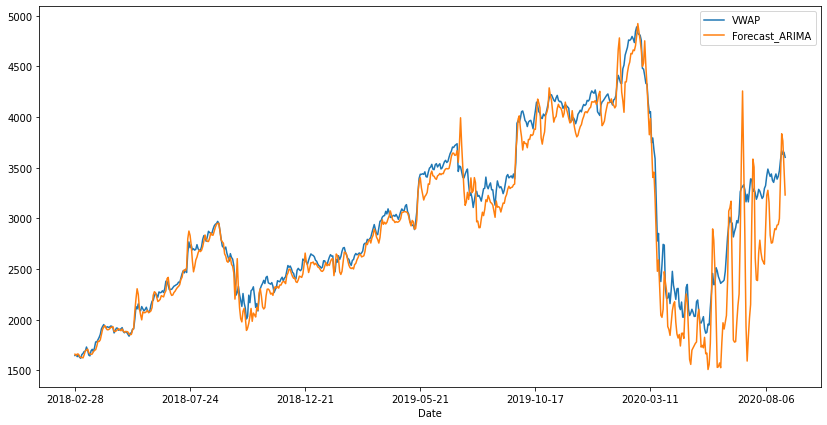

In [33]:
# Lets plot the Actual Values to the Predicted values by the Model #
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

Note that : The Model was predicting VWAP with very high Accuracy until March 2020 . Which we know what happened after that : 'The Corona pandemic'.After the pandemic the markets were super Unstable ,leading to such drastic highs and lows in predictions after March 2020.This is Clearly Visualized in the graph.

**8.Accuracy Matrix and R Squared Value**

In [64]:
x=test_data.iloc[:,8].values
y=test_data.iloc[:,29].values
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
am = np.concatenate((x,y),1)
am[:10]
# x is the Actual VWAP and y is the predicted VWAP #

array([[1645.57      , 1658.17634323],
       [1652.22      , 1645.21800726],
       [1633.83      , 1660.1916043 ],
       [1652.31      , 1658.35296147],
       [1627.87      , 1636.42559491],
       [1617.85      , 1625.52773087],
       [1654.53      , 1626.52833643],
       [1665.45      , 1621.61468968],
       [1685.13      , 1652.12232702],
       [1686.47      , 1690.61037729]])

In [34]:
from sklearn.metrics import r2_score
r2_score(test_data['VWAP'],test_data['Forecast_ARIMA'])
# An R Squared Value of 0.89 makes this model a Good Fit #

0.8899449620757011

**9.Predicting the Value of VWAP in Realtime**

In [35]:
check = pd.read_csv('07-04-2021-TO-06-05-2021BAJFINANCEEQN.csv')

Note that : The training data stops at August 2018 and the below data is from April 2021 till today (May 07 2021)                                               .
I know it is not perfectly done in Real time , but this the best I could do,to bring in the essence of realtime in this project . please bear with me

***The same preliminary Analysis , Null value Detection & Rectification , Data Cleaning and Creation of Rolling Variables is done for this small Dataset as well***

In [36]:
check.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,VWAP,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,07-04-21,BAJFINANCE,EQ,4993.1,4980.0,5109.0,4940.00,5069.1,5077.10,5043.73,2402782,12118975497,130810,609473,25.37
1,08-04-21,BAJFINANCE,EQ,5077.1,5100.0,5115.0,5015.00,5027.3,5029.50,5061.08,1407879,7125389270,114649,383568,27.24
2,09-04-21,BAJFINANCE,EQ,5029.5,5000.0,5010.0,4845.00,4878.0,4872.30,4908.86,2902646,14248672058,239654,1274214,43.90
3,12-04-21,BAJFINANCE,EQ,4872.3,4740.0,4740.0,4400.00,4519.0,4511.00,4535.10,4500046,20408167515,334289,1261611,28.04
4,13-04-21,BAJFINANCE,EQ,4511.0,4535.1,4774.9,4514.05,4730.0,4728.75,4660.26,3175019,14796410483,204148,516743,16.28


In [37]:
check.set_index('Date',inplace=True)

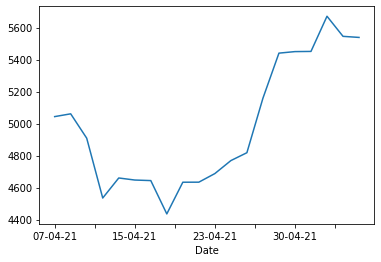

In [38]:
check['VWAP'].plot()

In [39]:
check.drop('No. of Trades',axis=1,inplace=True)

In [40]:
check.shape

(20, 13)

In [41]:
check.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
VWAP                      0
Total Traded Quantity     0
Turnover                  0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
dtype: int64

In [42]:
check.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'VWAP',
       'Total Traded Quantity', 'Turnover', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [43]:
lag_feature = ['High Price','Low Price','Total Traded Quantity', 'Turnover']
window3=3
window4=7

In [44]:
for feature in lag_feature:
    check[feature+'rolling_mean_3']=check[feature].rolling(window=window3).mean()
    check[feature+'rolling_mean_7']=check[feature].rolling(window=window4).mean()

In [45]:
for feature in lag_feature:
    check[feature+'rolling_std_3']=check[feature].rolling(window=window3).std()
    check[feature+'rolling_std_7']=check[feature].rolling(window=window4).std()

In [46]:
check.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,VWAP,Total Traded Quantity,Turnover,Deliverable Qty,% Dly Qt to Traded Qty,High Pricerolling_mean_3,High Pricerolling_mean_7,Low Pricerolling_mean_3,Low Pricerolling_mean_7,Total Traded Quantityrolling_mean_3,Total Traded Quantityrolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,High Pricerolling_std_3,High Pricerolling_std_7,Low Pricerolling_std_3,Low Pricerolling_std_7,Total Traded Quantityrolling_std_3,Total Traded Quantityrolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
07-04-21,BAJFINANCE,EQ,4993.1,4980.0,5109.0,4940.00,5069.1,5077.10,5043.73,2402782,12118975497,609473,25.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08-04-21,BAJFINANCE,EQ,5077.1,5100.0,5115.0,5015.00,5027.3,5029.50,5061.08,1407879,7125389270,383568,27.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-04-21,BAJFINANCE,EQ,5029.5,5000.0,5010.0,4845.00,4878.0,4872.30,4908.86,2902646,14248672058,1274214,43.90,5078.000000,NaN,4933.333333,NaN,2.237769e+06,NaN,1.116435e+10,NaN,58.966092,NaN,85.195853,NaN,7.609232e+05,NaN,3.656334e+09,NaN
12-04-21,BAJFINANCE,EQ,4872.3,4740.0,4740.0,4400.00,4519.0,4511.00,4535.10,4500046,20408167515,1261611,28.04,4955.000000,NaN,4753.333333,NaN,2.936857e+06,NaN,1.392741e+10,NaN,193.455421,NaN,317.582010,NaN,1.546367e+06,NaN,6.647214e+09,NaN
13-04-21,BAJFINANCE,EQ,4511.0,4535.1,4774.9,4514.05,4730.0,4728.75,4660.26,3175019,14796410483,516743,16.28,4841.633333,NaN,4586.350000,NaN,3.525904e+06,NaN,1.648442e+10,NaN,146.850275,NaN,231.142202,NaN,8.545535e+05,NaN,3.409086e+09,NaN


In [47]:
check.isna().sum()

Symbol                                 0
Series                                 0
Prev Close                             0
Open Price                             0
High Price                             0
Low Price                              0
Last Price                             0
Close Price                            0
VWAP                                   0
Total Traded Quantity                  0
Turnover                               0
Deliverable Qty                        0
% Dly Qt to Traded Qty                 0
High Pricerolling_mean_3               2
High Pricerolling_mean_7               6
Low Pricerolling_mean_3                2
Low Pricerolling_mean_7                6
Total Traded Quantityrolling_mean_3    2
Total Traded Quantityrolling_mean_7    6
Turnoverrolling_mean_3                 2
Turnoverrolling_mean_7                 6
High Pricerolling_std_3                2
High Pricerolling_std_7                6
Low Pricerolling_std_3                 2
Low Pricerolling

In [48]:
check.dropna(inplace=True)

In [49]:
check.isna().sum()

Symbol                                 0
Series                                 0
Prev Close                             0
Open Price                             0
High Price                             0
Low Price                              0
Last Price                             0
Close Price                            0
VWAP                                   0
Total Traded Quantity                  0
Turnover                               0
Deliverable Qty                        0
% Dly Qt to Traded Qty                 0
High Pricerolling_mean_3               0
High Pricerolling_mean_7               0
Low Pricerolling_mean_3                0
Low Pricerolling_mean_7                0
Total Traded Quantityrolling_mean_3    0
Total Traded Quantityrolling_mean_7    0
Turnoverrolling_mean_3                 0
Turnoverrolling_mean_7                 0
High Pricerolling_std_3                0
High Pricerolling_std_7                0
Low Pricerolling_std_3                 0
Low Pricerolling

In [50]:
check.shape

(14, 29)

In [51]:
check.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'VWAP',
       'Total Traded Quantity', 'Turnover', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'High Pricerolling_mean_3',
       'High Pricerolling_mean_7', 'Low Pricerolling_mean_3',
       'Low Pricerolling_mean_7', 'Total Traded Quantityrolling_mean_3',
       'Total Traded Quantityrolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'High Pricerolling_std_3',
       'High Pricerolling_std_7', 'Low Pricerolling_std_3',
       'Low Pricerolling_std_7', 'Total Traded Quantityrolling_std_3',
       'Total Traded Quantityrolling_std_7', 'Turnoverrolling_std_3',
       'Turnoverrolling_std_7'],
      dtype='object')

In [52]:
ind_features = ['High Pricerolling_mean_3',
       'High Pricerolling_mean_7', 'Low Pricerolling_mean_3',
       'Low Pricerolling_mean_7', 'Total Traded Quantityrolling_mean_3',
       'Total Traded Quantityrolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7','High Pricerolling_std_3',
       'High Pricerolling_std_7', 'Low Pricerolling_std_3',
       'Low Pricerolling_std_7', 'Total Traded Quantityrolling_std_3',
       'Total Traded Quantityrolling_std_7', 'Turnoverrolling_std_3',
       'Turnoverrolling_std_7']

**10.Forecasting for the Second Dataset**

In [53]:
forecast1=model.predict(n_periods=len(check), exogenous=check[ind_features])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [54]:
check['Forecast_ARIMA']=forecast1

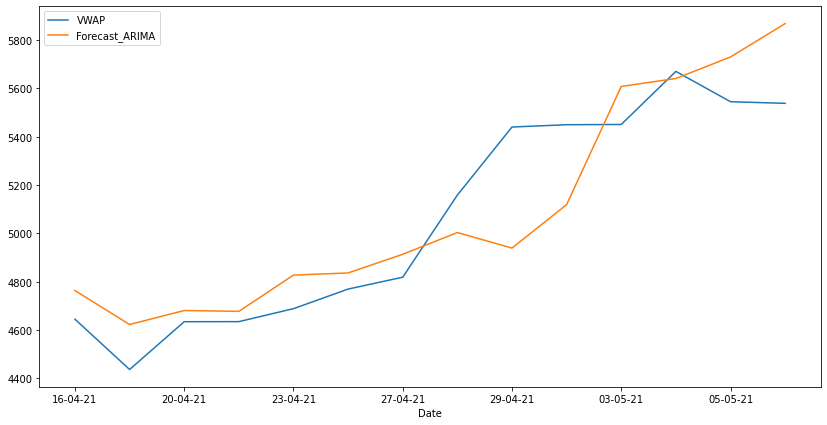

In [55]:
# plotting Predicted Values VS Actual Values #
check[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

In [56]:
from sklearn.metrics import r2_score
r2_score(check['VWAP'],check['Forecast_ARIMA'])

0.7443838101034119

**We can see that R Squared Value has dropped Significantly from (0.89 to 0.74).The main reason for the fall in accuracy is beacuse of the Time period Gap inbetween August 2018 and April 2021.Many things could have happened in the market in these 3 years, whose effects are not Imbued into the model. But Even after that Information Disadvantage the model has a solid 0.74 R Square , which is Commendable.**